# Boston Marathon Data Analysis and Modeling
## Project Goal
Have a good understanding of the Boston Marathon finishers data set and predict the estimated completion time of a runner

### Business Understanding 
Running is a sport that can be taken up at any age and attracts a diverse group of people. 
I downloaded the Boston Marathon Finishers Data set from Kaggle for years 2016,2017 and 2019. The Data sets include runners that completed the race.It has some basic demographic information and time taken to cross various milestones over the course of the run.
- What is the composition of Runners?
- What factors influence the race pace of a runner?
- Are we seeing overall improvement in race times yoy ?
- Are there noticeable changes in the paces of runners over the course of the marathon ?

### Modeling
- Can we project the Completion time for a runner with reasonable accuracy ?

### Preview the data
First , lets import the necessary python packages and libraries , read in the data files. 

In [2]:
#Import standard python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

#Importing data sets
df_2015 = pd.read_csv('./data/Boston_Marathon_2015.csv')
df_2016 = pd.read_csv('./data/Boston_Marathon_2016.csv')
df_2017 = pd.read_csv('./data/Boston_Marathon_2017.csv')

#Bring all data sets together
df_all=pd.concat([df_2015,df_2016,df_2017])

#Previewing data
df_all.head()                  

Bib                   Name  Age M/F         City State Country Citizen  \
0   3         Desisa, Lelisa   25   M         Ambo   NaN     ETH     NaN   
1   4  Tsegay, Yemane Adhane   30   M  Addis Ababa   NaN     ETH     NaN   
2   8         Chebet, Wilson   29   M     Marakwet   NaN     KEN     NaN   
3  11       Kipyego, Bernard   28   M      Eldoret   NaN     KEN     NaN   
4  10          Korir, Wesley   32   M       Kitale   NaN     KEN     NaN   

  Unnamed: 8       5K  ...      30K      35K      40K     Pace Proj Time  \
0        NaN  0:14:43  ...  1:32:00  1:47:59  2:02:39  0:04:56         -   
1        NaN  0:14:43  ...  1:31:59  1:47:59  2:02:42  0:04:58         -   
2        NaN  0:14:43  ...  1:32:00  1:47:59  2:03:01  0:04:59         -   
3        NaN  0:14:43  ...  1:32:00  1:48:03  2:03:47  0:05:00         -   
4        NaN  0:14:43  ...  1:32:00  1:47:59  2:03:27  0:05:00         -   

  Official Time Overall Gender Division  Year  
0       2:09:17       1      1        1  2015  
1       2:09:48       2      2        2  2015  
2       2:10:22       3      3        3  2015  
3       2:10:47       4      4        4  2015  
4       2:10:49       5      5        5  2015  

[5 rows x 25 columns]

In [3]:
# What are the data types for each field
df_all.dtypes

Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 8       object
5K               object
10K              object
15K              object
20K              object
Half             object
25K              object
30K              object
35K              object
40K              object
Pace             object
Proj Time        object
Official Time    object
Overall           int64
Gender            int64
Division          int64
Year              int64
dtype: object

## Data Understanding and Preparation

### Question 1. 
How many runners are there year over year 

In [4]:
#how many runners yoy
runner_cnt = df_all.groupby('Year').count()
runner_cnt

Bib   Name    Age    M/F   City  State  Country  Citizen  Unnamed: 8  \
Year                                                                           
2015  26597  26597  26597  26597  26597  24046    26597     1064          67   
2016  26630  26630  26630  26630  26629  23783    26630     1122          83   
2017  26410  26410  26410  26410  26410  22815    26410     1254          91   

         5K  ...    25K    30K    35K    40K   Pace  Proj Time  Official Time  \
Year         ...                                                                
2015  26597  ...  26597  26597  26597  26597  26597      26597          26597   
2016  26630  ...  26630  26630  26630  26630  26630      26630          26630   
2017  26410  ...  26410  26410  26410  26410  26410      26410          26410   

      Overall  Gender  Division  
Year                             
2015    26597   26597     26597  
2016    26630   26630     26630  
2017    26410   26410     26410  

[3 rows x 24 columns]

### Question2. 
Which columns with large % of missing values? Remove these columns and create a clean data frame.


In [5]:
#overall clean data set - Higher % of mssing values in fields -Citizen,State,Unnamed -Will Remove
df_all.columns
runners =df_all.drop(['Citizen','State','Unnamed: 8'],axis=1) # create new dataframe ,remove specified colmns
runners.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'Country', '5K', '10K', '15K',
       '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Proj Time',
       'Official Time', 'Overall', 'Gender', 'Division', 'Year'],
      dtype='object')

### Question 3.
Can we group runners by Age brackets ? 

In [7]:
#check distribution of runner ages
runners['Age'].describe()

count    79637.000000
mean        42.415360
std         11.355393
min         18.000000
25%         34.000000
50%         42.000000
75%         50.000000
max         84.000000
Name: Age, dtype: float64

In [8]:
#group runners into Age Buckets -
#qcut -divide up the underlying age data into equal sized bins. 
#The function defines the bins using percentiles based on the distribution of the data
runners['Age_Group'] = pd.qcut(runners['Age'], q=10, precision=0)
runners.head()

Bib                   Name  Age M/F         City Country       5K      10K  \
0   3         Desisa, Lelisa   25   M         Ambo     ETH  0:14:43  0:29:43   
1   4  Tsegay, Yemane Adhane   30   M  Addis Ababa     ETH  0:14:43  0:29:43   
2   8         Chebet, Wilson   29   M     Marakwet     KEN  0:14:43  0:29:43   
3  11       Kipyego, Bernard   28   M      Eldoret     KEN  0:14:43  0:29:44   
4  10          Korir, Wesley   32   M       Kitale     KEN  0:14:43  0:29:44   

       15K      20K  ...      35K      40K     Pace Proj Time Official Time  \
0  0:44:57  1:00:29  ...  1:47:59  2:02:39  0:04:56         -       2:09:17   
1  0:44:58  1:00:28  ...  1:47:59  2:02:42  0:04:58         -       2:09:48   
2  0:44:57  1:00:29  ...  1:47:59  2:03:01  0:04:59         -       2:10:22   
3  0:45:01  1:00:29  ...  1:48:03  2:03:47  0:05:00         -       2:10:47   
4  0:44:58  1:00:28  ...  1:47:59  2:03:27  0:05:00         -       2:10:49   

  Overall Gender Division  Year     Age_Group  
0       1      1        1  2015  (17.0, 27.0]  
1       2      2        2  2015  (27.0, 31.0]  
2       3      3        3  2015  (27.0, 31.0]  
3       4      4        4  2015  (27.0, 31.0]  
4       5      5        5  2015  (31.0, 36.0]  

[5 rows x 23 columns]

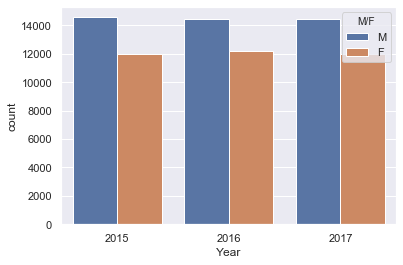

In [9]:
#What is the composition of Runners?
sns.set(style="darkgrid")
ax = sns.countplot(x="Year",hue="M/F", data=runners)


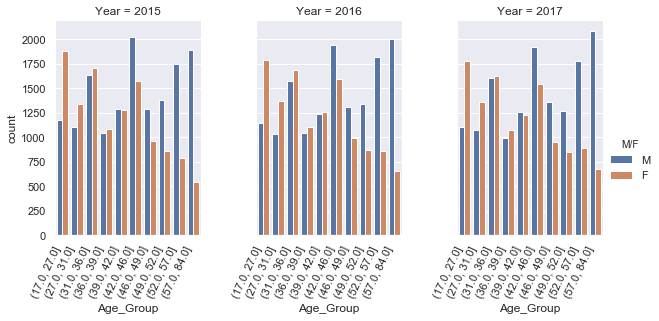

In [10]:
# Check YOY Distribution of runners based on Age groups
g = sns.catplot(x="Age_Group", hue="M/F", col="Year",
                data=runners, kind="count",
                height=4, aspect=.7)
g.set_xticklabels(rotation=65, horizontalalignment='right');

To answer some of the subsequent questions and modeling excercise, we will need to convert the fields that contain runner timings from string to minutes.
We need to define a function for re-usability and append new fields to the data frame with the time conversions.

In [13]:
#Based on data type definitions the overall paces need to be converted to minutes to be usable for later analysis
#Defining a function that will Convert time to mins
def time_to_mins(x):
    '''Takes in a string x, returns the time as total_mins'''
    if x is not '-':
        time = x.split(":")
        hours = int(time[0])
        mins = int(time[1])
        secs = int(time[2])
        total_mins = hours*60 + mins + secs/60
        return float(total_mins)

In [12]:
#Convert each of the fields containing time to mins

runners["Total Time (mins)"]=df_all.apply(lambda x: time_to_mins(x["Official Time"]),axis=1)
runners["5K (mins)"]=df_all.apply(lambda x: time_to_mins(x["5K"]),axis=1)
runners["10K (mins)"]=df_all.apply(lambda x: time_to_mins(x["10K"]),axis=1)
runners["15K (mins)"]=df_all.apply(lambda x: time_to_mins(x["15K"]),axis=1)
runners["20K (mins)"]=df_all.apply(lambda x: time_to_mins(x["20K"]),axis=1)
runners["Half (mins)"]=df_all.apply(lambda x: time_to_mins(x["Half"]),axis=1)
runners["25K (mins)"]=df_all.apply(lambda x: time_to_mins(x["25K"]),axis=1)
runners["30K (mins)"]=df_all.apply(lambda x: time_to_mins(x["30K"]),axis=1)
runners["35K (mins)"]=df_all.apply(lambda x: time_to_mins(x["35K"]),axis=1)
runners["40K (mins)"]=df_all.apply(lambda x: time_to_mins(x["40K"]),axis=1)
runners["Pace (mins)"]=df_all.apply(lambda x: time_to_mins(x["Pace"]),axis=1)



Now that we have the time formatted in minutes .We can anwswer the following question.
Are we seeing overall improvement in race times YOY (Year over Year) ?

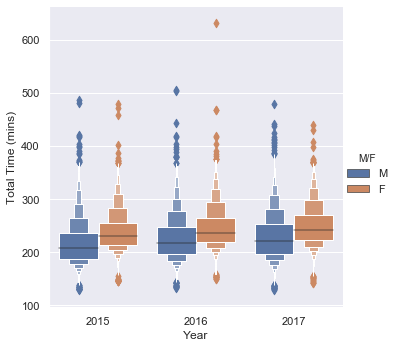

In [14]:
#Distribution of Total Time mins by Gender
#Box Plot
sns.catplot(x="Year", y="Total Time (mins)", hue="M/F",
            kind="boxen", dodge=True, data=runners);

Next we move on to checking the runner paces over the course of the race. In order to do that we can compute the incremental paces for the runner every 3.1 miles (5K).
Which leads us to making progress on the next question Are there noticeable changes in the paces of runners over the course of the marathon ?

In [15]:
#Calcualte incremental pace for each 5K distance
runners["5K_Pace"] = runners["5K (mins)"]/3.1
runners["10K_Pace"] = (runners["10K (mins)"]-runners["5K (mins)"])/3.1
runners["15K_Pace"] = (runners["15K (mins)"]-runners["10K (mins)"])/3.1
runners["20K_Pace"] = (runners["20K (mins)"]-runners["15K (mins)"])/3.1
runners["Half_Pace"] =(runners["Half (mins)"])/13.1
runners["25K_Pace"] = (runners["25K (mins)"]-runners["20K (mins)"])/3.1
runners["30K_Pace"] = (runners["30K (mins)"]-runners["25K (mins)"])/3.1
runners["35K_Pace"] = (runners["35K (mins)"]-runners["30K (mins)"])/3.1
runners["40K_Pace"] =(runners["40K (mins)"]-runners["35K (mins)"])/3.1

runners.head()

Bib                   Name  Age M/F         City Country       5K      10K  \
0   3         Desisa, Lelisa   25   M         Ambo     ETH  0:14:43  0:29:43   
1   4  Tsegay, Yemane Adhane   30   M  Addis Ababa     ETH  0:14:43  0:29:43   
2   8         Chebet, Wilson   29   M     Marakwet     KEN  0:14:43  0:29:43   
3  11       Kipyego, Bernard   28   M      Eldoret     KEN  0:14:43  0:29:44   
4  10          Korir, Wesley   32   M       Kitale     KEN  0:14:43  0:29:44   

       15K      20K  ... Pace (mins)   5K_Pace  10K_Pace  15K_Pace  20K_Pace  \
0  0:44:57  1:00:29  ...    4.933333  4.747312  4.838710  4.913978  5.010753   
1  0:44:58  1:00:28  ...    4.966667  4.747312  4.838710  4.919355  5.000000   
2  0:44:57  1:00:29  ...    4.983333  4.747312  4.838710  4.913978  5.010753   
3  0:45:01  1:00:29  ...    5.000000  4.747312  4.844086  4.930108  4.989247   
4  0:44:58  1:00:28  ...    5.000000  4.747312  4.844086  4.913978  5.000000   

  Half_Pace  25K_Pace  30K_Pace  35K_Pace  40K_Pace  
0  4.888041  5.043011  5.123656  5.155914  4.731183  
1  4.886768  5.048387  5.118280  5.161290  4.747312  
2  4.888041  5.043011  5.123656  5.155914  4.849462  
3  4.888041  5.043011  5.123656  5.177419  5.075269  
4  4.886768  5.048387  5.123656  5.155914  4.989247  

[5 rows x 43 columns]

In [16]:
# Evaluate mean paces for Gender separately 
avg_by_Gender_5k=pd.DataFrame([runners.groupby(['M/F'])['5K_Pace'].mean()])
avg_by_Gender_10k=pd.DataFrame([runners.groupby(['M/F'])['10K_Pace'].mean()])
avg_by_Gender_15k=pd.DataFrame([runners.groupby(['M/F'])['15K_Pace'].mean()])
avg_by_Gender_20k=pd.DataFrame([runners.groupby(['M/F'])['20K_Pace'].mean()])
avg_by_Gender_25k=pd.DataFrame([runners.groupby(['M/F'])['25K_Pace'].mean()])
avg_by_Gender_30k=pd.DataFrame([runners.groupby(['M/F'])['30K_Pace'].mean()])
avg_by_Gender_35k=pd.DataFrame([runners.groupby(['M/F'])['35K_Pace'].mean()])
avg_by_Gender_40k=pd.DataFrame([runners.groupby(['M/F'])['40K_Pace'].mean()])

#spot checking incremental pace change 5 K , 20 K milemarkers
print(avg_by_Gender_5k)
print(avg_by_Gender_20k)
#buffer 5% slower male; 4% slower female

M/F             F        M
5K_Pace  8.653783  7.84416
M/F              F         M
20K_Pace  9.135961  8.193466


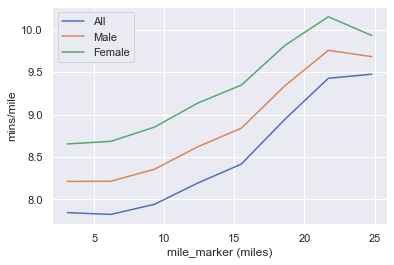

In [17]:
#avgs pace for each mile marker distance, incremental 5K Paces
avgs = [runners["5K_Pace"].mean(), runners["10K_Pace"].mean(), runners["15K_Pace"].mean(), runners["20K_Pace"].mean(),
        runners["25K_Pace"].mean(), runners["30K_Pace"].mean(), runners["35K_Pace"].mean(),runners["40K_Pace"].mean()]

avgs_M = [runners["5K_Pace"][runners["M/F"] == "M"].mean(), runners["10K_Pace"][runners["M/F"] == "M"].mean(), 
          runners["15K_Pace"][runners["M/F"] == "M"].mean(), runners["20K_Pace"][runners["M/F"] == "M"].mean(),
        runners["25K_Pace"][runners["M/F"] == "M"].mean(), runners["30K_Pace"][runners["M/F"] == "M"].mean(), 
          runners["35K_Pace"][runners["M/F"] == "M"].mean(),runners["40K_Pace"][runners["M/F"] == "M"].mean()]

avgs_F = [runners["5K_Pace"][runners["M/F"] == "F"].mean(), runners["10K_Pace"][runners["M/F"] == "F"].mean(), 
          runners["15K_Pace"][runners["M/F"] == "F"].mean(), runners["20K_Pace"][runners["M/F"] == "F"].mean(),
        runners["25K_Pace"][runners["M/F"] == "F"].mean(), runners["30K_Pace"][runners["M/F"] == "F"].mean(), 
          runners["35K_Pace"][runners["M/F"] == "F"].mean(),runners["40K_Pace"][runners["M/F"] == "F"].mean()]

mile_marker = [3.1,6.2,9.3,12.4,15.5,18.6,21.7,24.8]
plt.plot(mile_marker,avgs_M)
plt.plot(mile_marker,avgs)
plt.plot(mile_marker,avgs_F)
plt.xlabel("mile_marker (miles)")
plt.ylabel("mins/mile")
plt.legend(["All","Male","Female"])

In [ ]:
What factors influence the race pace of a runner?

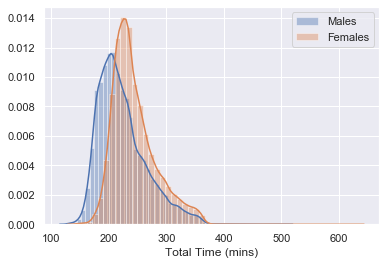

In [18]:
#finish time by Gender across all years
FinishTime_Mins= runners["Total Time (mins)"]
sns.distplot(FinishTime_Mins[runners["M/F"] == "M"])
sns.distplot(FinishTime_Mins[runners["M/F"] == "F"])
plt.legend(["Males","Females"])

### Data Modeling

##### Model 1 - Data Preparation and Model Results

In [20]:
#Preparing for modeling 
# <1% of users missing 5k pace info , delete rows where pace info is missing
runners['5K_Pace'].isnull().sum()/len(runners['5K_Pace'])
#0.00287
#drop rows where 5K pace is not recorded
runners_cln=runners.dropna(how='any', subset=['5K_Pace'])
#check if there are any null values
runners_cln['5K_Pace'].isnull().sum()

runners_cln

Bib                      Name  Age M/F          City Country  \
0          3            Desisa, Lelisa   25   M          Ambo     ETH   
1          4     Tsegay, Yemane Adhane   30   M   Addis Ababa     ETH   
2          8            Chebet, Wilson   29   M      Marakwet     KEN   
3         11          Kipyego, Bernard   28   M       Eldoret     KEN   
4         10             Korir, Wesley   32   M        Kitale     KEN   
...      ...                       ...  ...  ..           ...     ...   
26405  25166  Steinbach, Paula Eyvonne   61   F       Ontario     USA   
26406  25178        Avelino, Andrew R.   25   M  Fayetteville     USA   
26407  27086           Hantel, Johanna   57   F       Malvern     USA   
26408  25268              Reilly, Bill   64   M      New York     USA   
26409  25266             Rigsby, Scott   48   M    Alpharetta     USA   

            5K      10K      15K      20K  ... Pace (mins)    5K_Pace  \
0      0:14:43  0:29:43  0:44:57  1:00:29  ...    4.933333   4.747312   
1      0:14:43  0:29:43  0:44:58  1:00:28  ...    4.966667   4.747312   
2      0:14:43  0:29:43  0:44:57  1:00:29  ...    4.983333   4.747312   
3      0:14:43  0:29:44  0:45:01  1:00:29  ...    5.000000   4.747312   
4      0:14:43  0:29:44  0:44:58  1:00:28  ...    5.000000   4.747312   
...        ...      ...      ...      ...  ...         ...        ...   
26405  0:46:44  1:35:41  2:23:35  3:12:44  ...   16.400000  15.075269   
26406  0:32:03  1:05:33  1:52:17  2:49:41  ...   16.666667  10.338710   
26407  0:53:11  1:43:36  2:32:36        -  ...   16.783333  17.155914   
26408  0:40:34  1:27:19  2:17:17  3:11:40  ...   16.816667  13.086022   
26409  0:39:36  1:17:12  2:00:10  2:58:55  ...   18.250000  12.774194   

        10K_Pace   15K_Pace   20K_Pace  Half_Pace   25K_Pace   30K_Pace  \
0       4.838710   4.913978   5.010753   4.888041   5.043011   5.123656   
1       4.838710   4.919355   5.000000   4.886768   5.048387   5.118280   
2       4.838710   4.913978   5.010753   4.888041   5.043011   5.123656   
3       4.844086   4.930108   4.989247   4.888041   5.043011   5.123656   
4       4.844086   4.913978   5.000000   4.886768   5.048387   5.123656   
...          ...        ...        ...        ...        ...        ...   
26405  15.790323  15.451613  15.854839  15.535623  19.150538  16.462366   
26406  10.806452  15.075269  18.516129  13.773537  19.559140  19.258065   
26407  16.263441  15.806452        NaN  16.519084        NaN  16.537634   
26408  15.080645  16.118280  17.543011  15.458015  17.580645  19.672043   
26409  12.129032  13.860215  18.951613  14.371501  28.489247  22.575269   

        35K_Pace   40K_Pace  
0       5.155914   4.731183  
1       5.161290   4.747312  
2       5.155914   4.849462  
3       5.177419   5.075269  
4       5.155914   4.989247  
...          ...        ...  
26405  16.827957  16.661290  
26406  20.575269  19.532258  
26407  17.397849  17.446237  
26408  19.021505  16.134409  
26409  19.967742  20.086022  

[79408 rows x 43 columns]

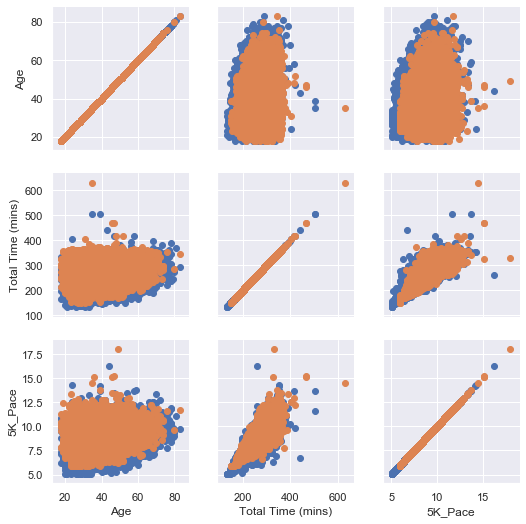

In [21]:
#Age,Finish Time; Gender ,Finish time 
#df.loc[df[‘Color’] == ‘Green’]
g = sns.PairGrid(runners_cln.loc[runners_cln['Year']==2016], vars=["Age", "Total Time (mins)","5K_Pace"], hue="M/F")
g.map(plt.scatter);

In [23]:
# Predict Total mins based on 5K pace 
y = runners_cln['Total Time (mins)']
X = runners_cln[['5K_Pace']]

#Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=0) 


lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict
y_test_preds = lm_model.predict(X_test) 

In [24]:
#score the model   
RMSE = np.sqrt(mean_squared_error(y_test, y_test_preds))
r2_squared = r2_score(y_test, y_test_preds)
residuals = y_test - y_test_preds
   
print("RMSE:",RMSE,"r2_squared:",r2_squared,"residuals:",residuals)

RMSE: 19.08696337870843 r2_squared: 0.7882915583040302 residuals: 11426   -23.689039
22217     4.911496
4451    -17.715800
6992     -9.559912
25798    58.724279
           ...    
18391   -15.142612
9992     -8.305145
3682     -7.830686
5596     -3.425794
22027    28.860625
Name: Total Time (mins), Length: 15882, dtype: float64


#### Model2 - Data Preparation and Model Results

In [25]:
dummy=pd.get_dummies(runners_cln["M/F"])

runners_gender=pd.concat([runners_cln,dummy],axis=1)
runners_gender.head()

Bib                   Name  Age M/F         City Country       5K      10K  \
0   3         Desisa, Lelisa   25   M         Ambo     ETH  0:14:43  0:29:43   
1   4  Tsegay, Yemane Adhane   30   M  Addis Ababa     ETH  0:14:43  0:29:43   
2   8         Chebet, Wilson   29   M     Marakwet     KEN  0:14:43  0:29:43   
3  11       Kipyego, Bernard   28   M      Eldoret     KEN  0:14:43  0:29:44   
4  10          Korir, Wesley   32   M       Kitale     KEN  0:14:43  0:29:44   

       15K      20K  ...  10K_Pace  15K_Pace  20K_Pace Half_Pace  25K_Pace  \
0  0:44:57  1:00:29  ...  4.838710  4.913978  5.010753  4.888041  5.043011   
1  0:44:58  1:00:28  ...  4.838710  4.919355  5.000000  4.886768  5.048387   
2  0:44:57  1:00:29  ...  4.838710  4.913978  5.010753  4.888041  5.043011   
3  0:45:01  1:00:29  ...  4.844086  4.930108  4.989247  4.888041  5.043011   
4  0:44:58  1:00:28  ...  4.844086  4.913978  5.000000  4.886768  5.048387   

   30K_Pace  35K_Pace  40K_Pace  F  M  
0  5.123656  5.155914  4.731183  0  1  
1  5.118280  5.161290  4.747312  0  1  
2  5.123656  5.155914  4.849462  0  1  
3  5.123656  5.177419  5.075269  0  1  
4  5.123656  5.155914  4.989247  0  1  

[5 rows x 45 columns]

In [27]:
# Predict Total mins based on 5K pace and Gender
y = runners_gender['Total Time (mins)']
X = runners_gender[['5K_Pace','F','M']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=0)

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit

y_test_preds = lm_model.predict(X_test) 

RMSE = np.sqrt(mean_squared_error(y_test, y_test_preds))
r2_squared = r2_score(y_test, y_test_preds)
residuals = y_test - y_test_preds
   
print("RMSE:",RMSE,"r2_squared:",r2_squared,"residuals:",residuals)

RMSE: 19.0362853033722 r2_squared: 0.7894142861904991 residuals: 11426   -22.185393
22217     5.959542
4451    -18.698650
6992     -7.717821
25798    57.036643
           ...    
18391   -16.871158
9992     -6.699222
3682     -8.765188
5596     -4.297070
22027    30.302904
Name: Total Time (mins), Length: 15882, dtype: float64


## Evaluation
### What is the composition of Runners?
There are approx 14% more Male than Female runners in the race. YOY composition remains relatively stable.
Delving further into participation by Age groups we can see that Female participation in race peaks around Age 46 and there is noticeable decline after that.
On the contrary the older males have higher participation and good distribution across all age groups

### Are we seeing overall improvement in race times YOY (Year over Year) ?
There is a slight improvement in the total time take to finish the race by both male and female runners. 
Given that each of the boxes have a upward shift YOY.(Refer Boxen plot)
The plot also clearly shows the difference in run time performance between male and female runners. 
Female runners rake longer time to finish the race , the bottom 25th percent is close to the 50th percent of male runner finish times.

### What factors influence the race pace of a runner?
From analysis above we can see that Gender strongly plays a part in the overall run time of a runner.
The highest performing female runners complete the race closer to the 200 mins mark vs that of the male counterparts starting around the 125 mins mark.
In General the completion time of the female runners is shifted to the right.
There is a wider variability in the completion times for the male runners.
The runners that are not high performers tend to start coverging towards the completion times of the female runners
Running a correlation analysis on Age and the 5K pace using the pair plots , we can see that the 5K pace of the runner is a good predictor of the overall race pace. Slow 5K pace indicates longer time to complete the race.
Interestingly , the Age of a runner does not indicate a clear relationship to the overall time taken to finish the race.

### Are there noticeable changes in the paces of runners over the course of the marathon ?
To look for visible performance decrease , i calculated incremental 5K paces over the course of the marathon.
From the chart it can be seen that across all runners (M/F) , there is a reduction in pace from 10 to 15 mile and a steeper reduction from 15 to 20 miles. 
However in the last 3 miles of the race, runners from both group are picking up pace . 
The pick up in pace is stronger in the Female runner group, close to a minute faster.

### Can we project a Completion time for a runner with reasonable accuracy ?
Based on observations above, in order to predict an approximate completion time for a runner , 
I used two versions of the linear model. The versions differed in terms of the input features that were provided.
Model 1 :Predict Completion time based on a single variable i.e. the 5K_Pace .
Model 2 :Predict Completion time based on a two variableuses 5K_Pace and Gender
Results : Model 2 has a slightly better evaluation — RMSE 19.03, R2_Squared 0.79
Using Model 2 ,We can explain almost 80% of the variability in Total Time to finish the race. 
Improving the model accuracy further may be possible with enriching the data set.
Another option that was experimented with was adding some factoring to 5K paces based on the average pace reductions 
observed over the course of the race, but, it did not influence the model accuracy.

## Deployment
Blog Post with Analysis [click me] (https://medium.com/@reshma.alex/boston-marathon-analysis-and-prediction-of-race-completion-time-d0ff10762bf3)

## Potential Expansion Paths
- Enrich data set with additional features to data set like weather and course details to refine model.
